In [2]:
import rebound
print(rebound.__build__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

May 21 2017 16:04:29


In [31]:
def run():
    sim = rebound.Simulation()
    sim.add(m=1, r=0.0046524726)
    sim.add(m=6.9e-6,a=25, r=7.8832491e-05)
    for i in range(6000):
        a = np.random.uniform(15,35)
        sim.add(a=a,e=0.01,inc=0.01, m=6.9e-6/600., r=9.3466253e-06,omega="uniform",Omega="uniform",l="uniform")
    sim.move_to_com()
    
    sim.integrator = "mercurius"
    sim.dt = 2.*np.pi*2. 
    sim.ri_ias15.min_dt = 1e-5*sim.dt
    sim.track_energy_offset = 1
    sim.collision = "direct"
    sim.collision_resolve = "merge"
    sim.collision_resolve_keep_sorted = 1
    sim.testparticle_type = 1
    sim.N_active = 2


    N=1000
    times = np.linspace(0.,2.*np.pi*2e3,N)
    energy = np.zeros((N))
    enc = np.zeros((N))    
    for i in range(N):
        sim.integrate(times[i],exact_finish_time=0)
        energy[i] = sim.calculate_energy()
        enc[i] = sim.ri_mercurius._encounterN
    return times, energy, enc

In [32]:
times, energy, enc = run()

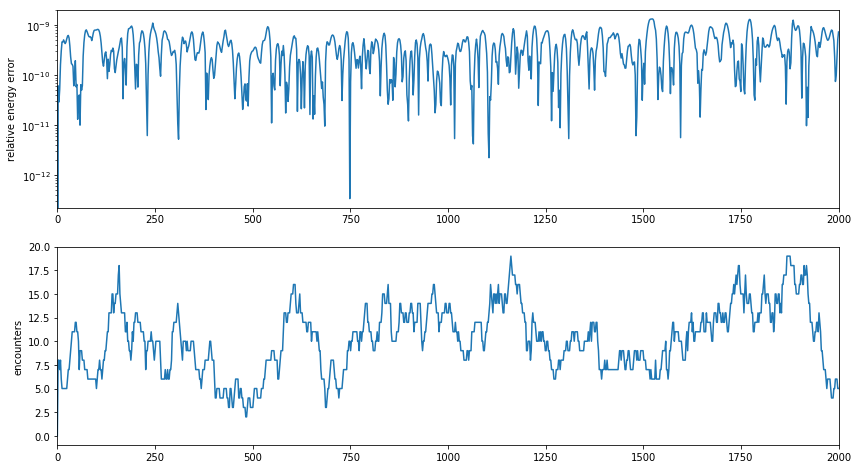

In [34]:
fix, ax = plt.subplots(2,1,figsize=(14,8))

ax[0].set_ylabel("relative energy error")
ax[0].set_yscale("log")
ax[0].set_xlim([0.,times[-1]/2./np.pi])
ax[0].plot(times/2./np.pi, np.fabs((energy-energy[0])/energy[0]));

ax[1].set_ylabel("encounters")
ax[1].set_xlim([0.,times[-1]/2./np.pi])
ax[1].plot(times/2./np.pi, enc);